# Explaining the difference between layers

Based on Figure 2, it is likely that there are different groups of layers.

Layer 28

Layer 19

Layer 15

Layer 41

Layer 38, 44

Layer 60, 63

Characteristics of different layers

Layer 15, 

19, 

What can I distinguish on:
- depth
- type of convolution
- order in block
- number of parameters
- size of the pretrained weight


# plot depth vs relative weight

# plot depth vs Log-test error after fine-tuning

# plot depth vs kt

# plot depth vs coefficient

# load data

In [2]:
%load_ext autoreload
%autoreload 2
import json
from pathlib import Path
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")

logdir = Path("/bigdata/cifar10/logs/decomposed")
import os
from datetime import datetime
from os.path import isdir

folders = os.listdir(logdir)
print(f"number of folders: {len(folders)}")
# from datetime import datetime

# dts = [datetime.fromtimestamp(int(x)) for x in folders]
# print(max(dts))
# print(min(dts))
from tddl.post_processing.path_utils import logdir_to_paths

paths = logdir_to_paths(logdir)

print(len(paths))
# baseline

baseline_path = Path("/bigdata/cifar10/logs/baselines/1646668631/rn18_18_dNone_128_adam_l0.001_g0.1_w0.0_sTrue")
# baseline_model = torch.load(baseline_path / "cnn_best.pth")
with open(baseline_path/'results.json') as json_file:
    baseline_result = json.load(json_file)
baseline_result
from tddl.post_processing.factorized_model import process_factorized_networks

# process_factorized_networks(paths, baseline_path)
from tddl.post_processing.path_utils import paths_to_df

df = paths_to_df(paths)
print(len(df))
df.head()

# df.groupby('rank').count()
# rank=0.90: 10 observations
# rank=0.75: 10 observstions

# Exclude the few observations (layer=28, decomp={cp,tucker}) where rank is 0.75 or 0.90

df = df[~df['rank'].isin(['0.75', '0.90'])]
df['test_error'] = 1 - df.test_acc
df['valid_error_before_ft'] = 1 - df.valid_acc_before_ft
df['valid_error'] = 1 - df.valid_acc

df['log_test_error'] = np.log(df.test_error)
df['log_valid_error_before_ft'] = np.log(df.valid_error_before_ft)
df['log_valid_error'] = np.log(df.valid_error)
df['rank'] = df['rank'].astype(float, copy=False)
# df['rank'].apply(float)
df['rank'].unique()
df['fact_rank'] = df['factorization'] + '-' + df['rank'].apply(str)
df['fact_layers'] = df['factorization'] + '-' + df['layers'].apply(str)
df['layers_fact'] = df['layers'].apply(str) + '-' + df['factorization'] 
df.head()
df = df.astype({
    'layers':"category",
    'fact_layers':"category",
    'layers_fact':"category",
})

number of folders: 260
260
260


/home/jetzeschuurman/gitProjects/phd/tltorch/tltorch/factorized_tensors/core.py:145: UserWarning: Creating a subclass of FactorizedTensor TensorizedTensor with no name.
  warnings.warn(f'Creating a subclass of FactorizedTensor {cls.__name__} with no name.')


In [4]:
df.columns

Index(['name', 'nr', 'relative_norm_weight', 'scaled_norm_weight',
       'diff_norm_weight', 'layers', 'factorization', 'rank', 'valid_acc',
       'valid_acc_before_ft', 'n_param_fact', 'test_acc', 'lr', 'optimizer',
       'norm_diff', 'norm_b', 'n_b', 'relative_norm', 'scaled_norm',
       'test_error', 'valid_error_before_ft', 'valid_error', 'log_test_error',
       'log_valid_error_before_ft', 'log_valid_error', 'fact_rank',
       'fact_layers', 'layers_fact'],
      dtype='object')

What can I distinguish on:
- depth: (nr / layer)
- type of convolution 
- order in block
- number of parameters (n_b)
- size of the pretrained weight (norm_b)

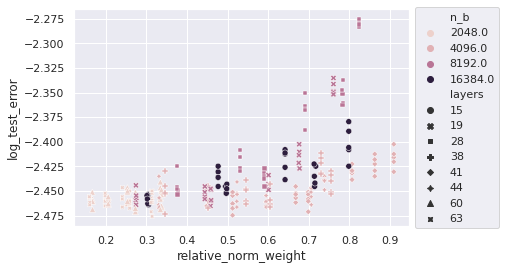

In [13]:
ax = sns.scatterplot(x="relative_norm_weight", y="log_test_error",
    data=df,
    hue="n_b",
    style="layers",
    # palette=['orange', 'b'],
)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

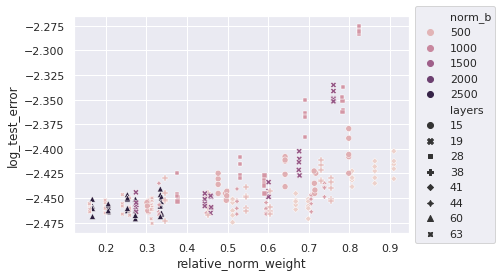

In [14]:
ax = sns.scatterplot(x="relative_norm_weight", y="log_test_error",
    data=df,
    hue="norm_b",
    style="layers",
    # palette=['orange', 'b'],
)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
df[['n_b']]

,n_b
0,2048.0
1,2048.0
2,2048.0
3,8192.0
5,2048.0
...,...
255,4096.0
256,2048.0
257,4096.0
258,16384.0
